In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm


In [2]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
print(salary)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
X = salary[['YearsExperience']]

In [6]:
y = salary['Salary']

In [7]:
print(salary)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [8]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

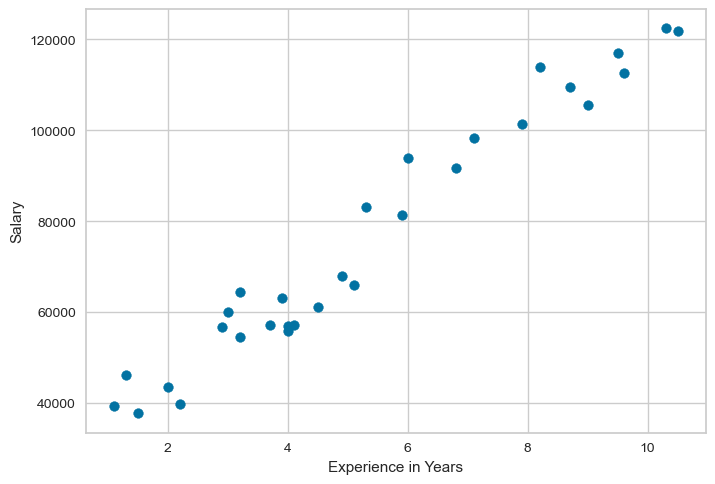

In [9]:
plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.show()

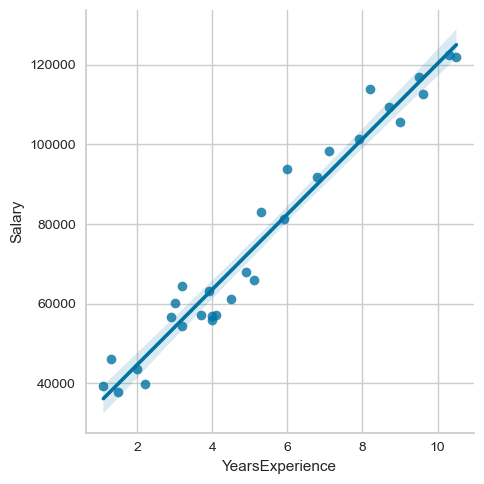

In [32]:
sns.lmplot(x = 'YearsExperience',y = 'Salary',data = salary)

In [10]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

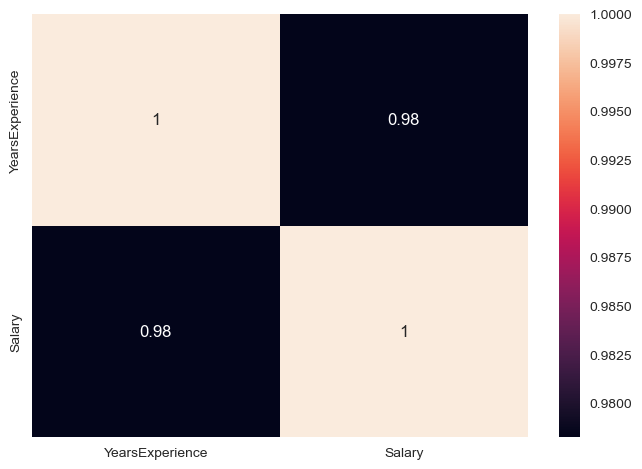

In [11]:
sns.heatmap(salary.corr(),annot=True)

In [12]:
#x = x.reshape(-1,2)
#y = y.reshape(-1,2)

In [13]:
X.shape

(30, 1)

In [14]:
y.shape

(30,)

In [15]:
#len_ = len(salary)
#split = int(len_*0.70)
#train, test = salary[0:split], salary[split:]

In [16]:
#len(train), len(test)

In [17]:
#len(x_train),len(x_test),len(y_train),len(y_test)

In [18]:
#x_train

HOMOSCEDACITY ASSUMPTION

# INSTANTIATE THE LINEAR MODEL AND VISUALIZER

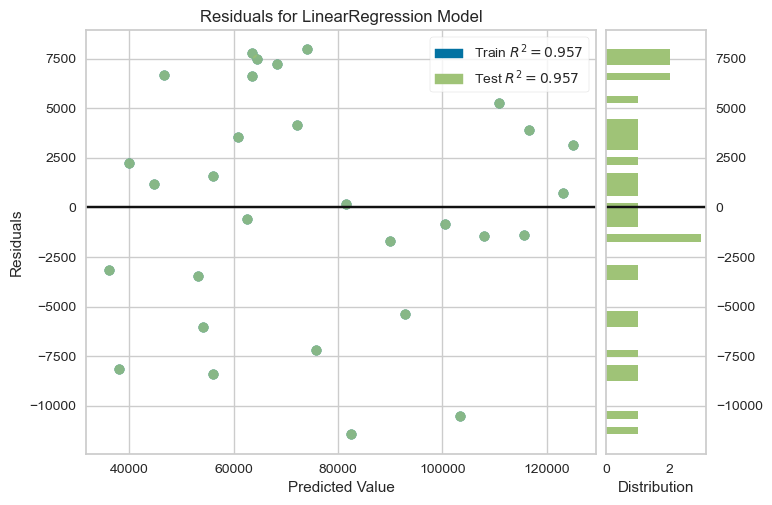

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(salary[['YearsExperience']],salary.Salary)  # FIT THE TRAINING DATA TO THE VISUALIZER
visualizer.score(salary[['YearsExperience']],salary.Salary)  # EVALUATE THE MODEL ON THE TEST DATA
visualizer.show()                # DRAW/SHOW/PROOF THE DATA

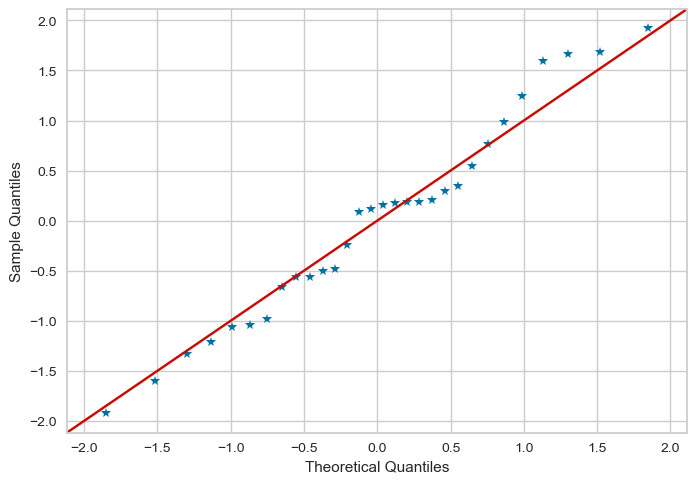

In [20]:
lin_reg = sm.OLS(salary[['YearsExperience']],salary.Salary).fit()
res = lin_reg.resid
sm.qqplot(res, fit = True, line = '45', marker = '*')
plt.show()

In [21]:
lin_reg = sm.OLS(salary[['YearsExperience']],salary.Salary).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:        YearsExperience   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):                    2.56e-24
Time:                        16:46:21   Log-Likelihood:                         -42.105
No. Observations:                  30   AIC:                                      86.21
Df Residuals:                      29   BIC:                                      87.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
#X.reshape(2,-1)
#y.reshape(2,-1)

In [24]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

# PREDICTING THE DATASET

In [25]:
y_pred = lin_reg.predict(X_test)
y_pred
# salary[['YearsExperience']],salary.Salary

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [26]:
lin_reg.predict([[6]])

C:\Users\91911\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81864.47494996])

# FINDINT THE COEFFICIENTS AND INTERCEPTS

# COEFFICIENT

In [27]:
print(lin_reg.coef_)

[9423.81532303]


# INTERCEPT

In [28]:
print(lin_reg.intercept_)

25321.583011776813


# EVELUATING THE MODEL

CALCULATING THE R SQUARED ERROR

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9024461774180497

In [30]:
print('Variance Score: %.2f' % r2_score(y_test,y_pred))

Variance Score: 0.90
